Initial setup

In [2]:
%load_ext autoreload
%autoreload 2

#modules for setting the path
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

#modules for opening the data
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Retrieving postgres info
from src.data import local
PORT = local.port
USER = local.user
HOST = local.host
PASSWORD = local.password

DBNAME = "opportunity_youth"

In [3]:
conn = psycopg2.connect(dbname=DBNAME, user=USER, password=PASSWORD, port=PORT, host=HOST)

<h1>PUMS</h1>

In [4]:
query = """
            SELECT p.puma, rtrim(puma_name), agep,
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            indp,
            povpip,
            SUM(pwgtp) as Weighted_Total
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            GROUP BY school, education_attainment, disability_status, employment_status, Parent_employment, indp, povpip,
                     agep, sex, rtrim(puma_name), p.puma
            ORDER BY school, agep DESC"""

skc_youth_2017 = pd.read_sql(query, conn)

In [5]:
query = """
            SELECT p.puma, rtrim(puma_name), agep,
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            indp,
            povpip,
            SUM(pwgtp) as Weighted_Total
            FROM pums_2018 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            GROUP BY school, education_attainment, disability_status, employment_status, Parent_employment, indp, povpip,
                     agep, sex, rtrim(puma_name), p.puma
            ORDER BY school, agep DESC"""

skc_youth_2018 = pd.read_sql(query, conn)

In [6]:
skc_youth_2017.employment_status.unique()

array(['employed', 'Unemployed/not in labor force', 'Armed Forces'],
      dtype=object)

In [7]:
oy_youth_2018 = skc_youth_2018[(skc_youth_2018['school'] == 'Has not attended in last 3 months') &
                               (skc_youth_2018['employment_status'] == 'Unemployed/not in labor force')]
oy_youth_2018

,puma,rtrim,agep,school,education_attainment,disability_status,parent_employment,employment_status,gender,indp,povpip,weighted_total
68,11615,"King County (Southeast)--Maple Valley, Covingt...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,male,0770,197.0,37.0
69,11611,"King County (West Central)--Burien, SeaTac, Tu...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,male,1270,204.0,38.0
70,11611,"King County (West Central)--Burien, SeaTac, Tu...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,male,4470,113.0,49.0
71,11613,King County (Southwest Central)--Kent City,24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,female,5391,0.0,45.0
72,11610,"King County (Central)--Renton City, Fairwood, ...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,female,5391,501.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1437,11614,King County (Southwest)--Auburn City & Lakeland,16.0,Has not attended in last 3 months,No HS or GED,no reported disability,One or both parents in labor force,Unemployed/not in labor force,female,None,501.0,23.0
1438,11611,"King County (West Central)--Burien, SeaTac, Tu...",16.0,Has not attended in last 3 months,No HS or GED,no reported disability,None,Unemployed/not in labor force,male,None,0.0,12.0
1439,11614,King County (Southwest)--Auburn City & Lakeland,16.0,Has not attended in last 3 months,No HS or GED,no reported disability,None,Unemployed/not in labor force,male,None,39.0,47.0
1440,11612,"King County (Far Southwest)--Federal Way, Des ...",16.0,Has not attended in last 3 months,No HS or GED,no reported disability,None,Unemployed/not in labor force,female,None,169.0,13.0


In [8]:
def compare_oy_with_total_youth(variable_and_status, youth_df):
    #takes a tuple, variable_and_status, that is compsed of the variable column you want to check 
    #and the status which you want to compare. Also takes the data frame you want to look at.
    variable = variable_and_status[0]
    status = variable_and_status[1]
    
    oy = youth_df[(youth_df['school'] == 'Has not attended in last 3 months') &
                  (youth_df['employment_status'] == 'Unemployed/not in labor force')]
    
    oy_total = oy.weighted_total.sum()
    oy_var_total = oy[oy[variable] == status].weighted_total.sum()
    oy_prct = oy_var_total/oy_total
    
    youth_total = youth_df.weighted_total.sum()
    youth_var_total = youth_df[youth_df[variable] == status].weighted_total.sum()
    youth_prct = youth_var_total/youth_total
    
    return {'Total Youth (ages 16-14)': youth_prct, 'Opportunity Youth': oy_prct}

compare_oy_with_total_youth(('disability_status', 'reported disability'),skc_youth_2018)

{'Total Youth (ages 16-14)': 0.06266471449487555,
 'Opportunity Youth': 0.15939220885172342}

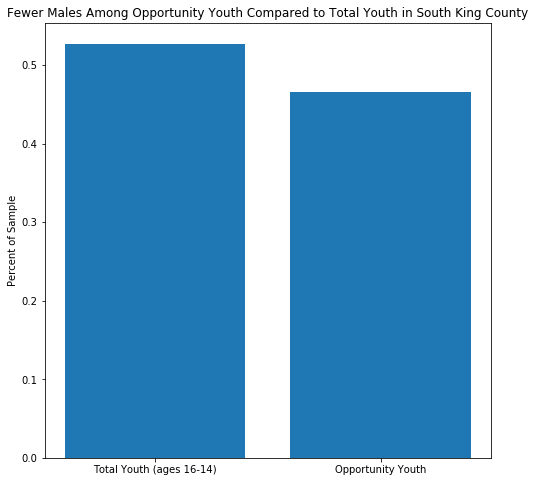

In [10]:
comparison_dict = compare_oy_with_total_youth(('gender', 'male'),skc_youth_2017)

col_names = list(comparison_dict.keys())
height_values = list(comparison_dict.values())

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_title('Fewer Males Among Opportunity Youth Compared to Total Youth in South King County')
ax.set_ylabel('Percent of Sample')
ax.bar(x=col_names, height=height_values);


In [11]:
skc_youth_2018.parent_employment.unique()

array([None, 'One or both parents in labor force',
       'Neither parent in labor force'], dtype=object)

<BarContainer object of 2 artists>

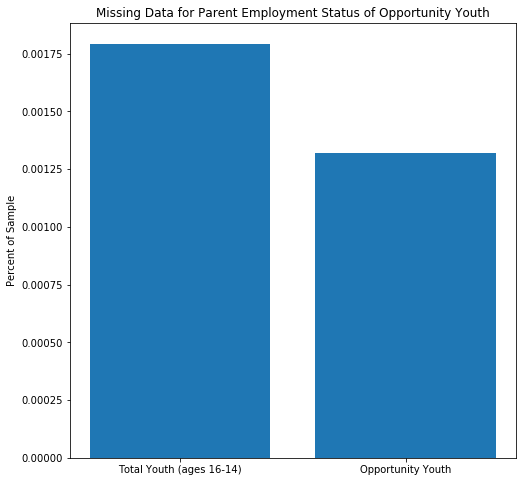

In [12]:
comparison_dict = compare_oy_with_total_youth(('parent_employment', 'Neither parent in labor force'),skc_youth_2017)

col_names = list(comparison_dict.keys())
height_values = list(comparison_dict.values())

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_title('Missing Data for Parent Employment Status of Opportunity Youth')
ax.set_ylabel('Percent of Sample')

ax.bar(x=col_names, height=height_values)


<BarContainer object of 2 artists>

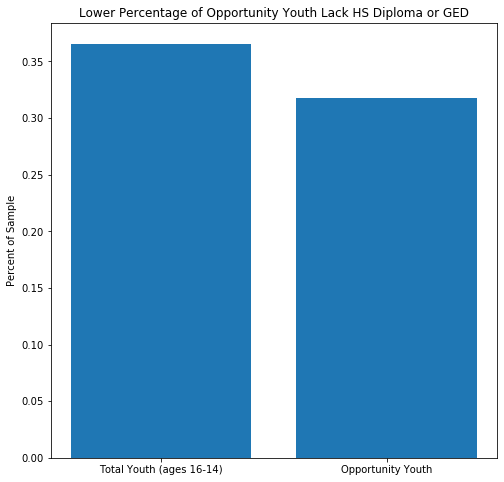

In [13]:
comparison_dict = compare_oy_with_total_youth(('education_attainment', 'No HS or GED'),skc_youth_2017)

col_names = list(comparison_dict.keys())
height_values = list(comparison_dict.values())

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_title('Lower Percentage of Opportunity Youth Lack HS Diploma or GED')
ax.set_ylabel('Percent of Sample')

ax.bar(x=col_names, height=height_values)


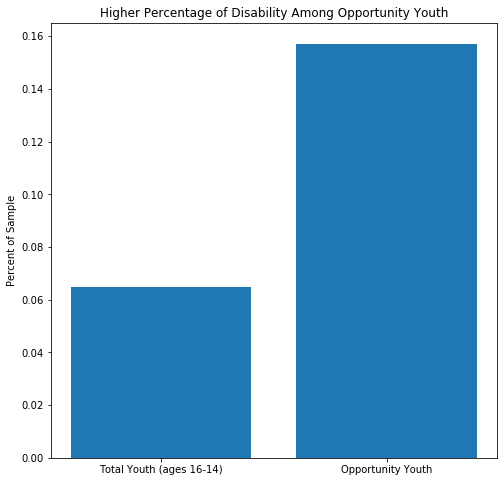

In [14]:
comparison_dict = compare_oy_with_total_youth(('disability_status', 'reported disability'),skc_youth_2017)

col_names = list(comparison_dict.keys())
height_values = list(comparison_dict.values())

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_title('Higher Percentage of Disability Among Opportunity Youth')
ax.set_ylabel('Percent of Sample')

ax.bar(x=col_names, height=height_values);
plt.savefig('Disability.png')

In [15]:
query = """
            SELECT p.puma, rtrim(puma_name), agep,
                        CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            CASE WHEN p.racasn = '1' THEN 'asian'
                 WHEN p.racblk = '1' THEN 'black or African American'
                 WHEN p.racwht = '1' THEN 'white'
                 WHEN p.hisp <> '1' THEN 'hispanic'
                 END as race_or_ethnicity,
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.ddrs = '1' THEN 'Self-care difficulty'
                 WHEN p.dear = '1' THEN 'Hearing difficulty'
                 WHEN p.deye = '1' THEN 'Vision difficulty'
                 WHEN p.dphy = '1' THEN 'Ambulatory difficulty'
                 WHEN p.drem = '1' THEN 'Cognitive difficulty'
                 ELSE 'None reported'
                 END as disability_type,
            CASE WHEN p.cit IN ('1','2','3','4') THEN 'US Citizen'
                 WHEN p.cit = '5' THEN 'Not US Citizen'
                 END as Citizenship,
            CASE WHEN p.eng IN ('3','4') THEN 'Poor or No English language'
                 ELSE 'English Speaker'
                 END as English_language,
            CASE WHEN p.wkl = '1' THEN 'employed in the last year'
                 WHEN p.wkl in ('2','3') THEN 'not employed in the last year'
                 END AS last_employed,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.mar = '1' THEN 'married'
                 WHEN p.mar = '5' THEN 'never married'
                 ELSE 'divorced, widowed, or separated'
                 END as marital_status,
            CASE WHEN p.fer = '1' THEN 'yes'
                 END AS Child_born_las_year,
            CASE WHEN p.paoc in ('1','2','3') THEN 'own child(ren)'
                 ELSE 'no own children'
                 END as Presence_of_children,
            CASE WHEN p.mig = '1' THEN 'lived here last year'
                 ELSE 'moved here last year'
                 END AS Moved,
            CASE WHEN p.hicov = '1' THEN 'yes'
                 ELSE 'no'
                 END as Has_Health_Insurance,
            pap as Public_Assistance_Income_past_year,
            pwgtp as Weight
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma LIKE '116%'

            ORDER BY school, agep DESC"""
            
KC_youth_2018 = pd.read_sql(query, conn)
KC_youth_2018.head()

,puma,rtrim,agep,gender,race_or_ethnicity,school,education_attainment,employment_status,disability_status,disability_type,...,english_language,last_employed,parent_employment,marital_status,child_born_las_year,presence_of_children,moved,has_health_insurance,public_assistance_income_past_year,weight
0,11612,"King County (Far Southwest)--Federal Way, Des ...",94.0,male,white,Has not attended in last 3 months,No HS or GED,Unemployed/not in labor force,no reported disability,None reported,...,English Speaker,not employed in the last year,None,"divorced, widowed, or separated",None,no own children,lived here last year,yes,0.0,14.0
1,11609,"King County (Central)--Sammamish, Issaquah, Me...",94.0,male,white,Has not attended in last 3 months,post HS education,Unemployed/not in labor force,reported disability,Hearing difficulty,...,English Speaker,not employed in the last year,None,"divorced, widowed, or separated",None,no own children,lived here last year,yes,0.0,16.0
2,11615,"King County (Southeast)--Maple Valley, Covingt...",94.0,female,white,Has not attended in last 3 months,post HS education,Unemployed/not in labor force,reported disability,Self-care difficulty,...,English Speaker,not employed in the last year,None,"divorced, widowed, or separated",None,no own children,lived here last year,yes,0.0,29.0
3,11606,"King County (Northwest)--Shoreline, Kenmore & ...",94.0,male,asian,Has not attended in last 3 months,post HS education,Unemployed/not in labor force,reported disability,Ambulatory difficulty,...,English Speaker,not employed in the last year,None,"divorced, widowed, or separated",None,no own children,lived here last year,yes,0.0,31.0
4,11613,King County (Southwest Central)--Kent City,94.0,male,white,Has not attended in last 3 months,HS diploma or GED,Unemployed/not in labor force,reported disability,Hearing difficulty,...,English Speaker,not employed in the last year,None,"divorced, widowed, or separated",None,no own children,lived here last year,yes,0.0,18.0


In [16]:
total_population = KC_youth_2018.groupby('puma').weight.sum()
total_population

puma
11601    153740.0
11602    129617.0
11603    139515.0
11604    124894.0
11605    140873.0
11606    121037.0
11607    141634.0
11608    143211.0
11609    145366.0
11610    137597.0
11611    130977.0
11612    126863.0
11613    128434.0
11614    115509.0
11615    123510.0
11616    115491.0
Name: weight, dtype: float64

In [17]:
OY_youth = KC_youth_2018[(KC_youth_2018['employment_status']=='Unemployed/not in labor force')&
                         (KC_youth_2018['school']=='Has not attended in last 3 months')]

OY_population = OY_youth.groupby('puma').weight.sum()
OY_population

puma
11601    29024.0
11602    24598.0
11603    29597.0
11604    26400.0
11605    31676.0
11606    29744.0
11607    30707.0
11608    35357.0
11609    31655.0
11610    31740.0
11611    32185.0
11612    31484.0
11613    30065.0
11614    27898.0
11615    29231.0
11616    24706.0
Name: weight, dtype: float64

In [18]:
KC_youth_2018.english_language.unique()

array(['English Speaker', 'Poor or No English language'], dtype=object)

In [19]:
ESL = KC_youth_2018[KC_youth_2018['english_language']=='Poor or No English language']

ESL_population = ESL.groupby('puma').weight.sum()
ESL_population

puma
11601     2176.0
11602     2900.0
11603     3116.0
11604     5540.0
11605    10644.0
11606     4178.0
11607     4606.0
11608     7794.0
11609     3885.0
11610     9218.0
11611    12808.0
11612     6875.0
11613    11932.0
11614     6048.0
11615     1787.0
11616     1212.0
Name: weight, dtype: float64

In [20]:
OY_rate = OY_population/total_population
ESL_rate = ESL_population/total_population

OY_rate

puma
11601    0.188786
11602    0.189774
11603    0.212142
11604    0.211379
11605    0.224855
11606    0.245743
11607    0.216805
11608    0.246887
11609    0.217761
11610    0.230674
11611    0.245730
11612    0.248173
11613    0.234089
11614    0.241522
11615    0.236669
11616    0.213921
Name: weight, dtype: float64

In [21]:
ESL_rate

puma
11601    0.014154
11602    0.022374
11603    0.022335
11604    0.044358
11605    0.075557
11606    0.034518
11607    0.032520
11608    0.054423
11609    0.026726
11610    0.066993
11611    0.097788
11612    0.054192
11613    0.092904
11614    0.052360
11615    0.014468
11616    0.010494
Name: weight, dtype: float64

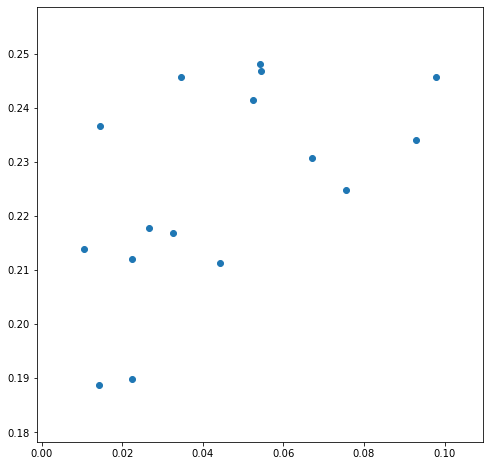

In [22]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.scatter(x=ESL_rate, y=OY_rate)

In [24]:
non_engish_vs_oy = pd.concat((ESL_rate, OY_rate), axis=1)

In [25]:
non_engish_vs_oy.columns = ['Non-english_rate', 'OY_rate']

In [33]:
OY_youth = KC_youth_2018[(KC_youth_2018['employment_status']=='Unemployed/not in labor force')&
                         (KC_youth_2018['school']=='Has not attended in last 3 months')]



TypeError: join() got an unexpected keyword argument 'left_index'

In [ ]:
def compare_oy_with_total_youth(variable_and_status, df_1, df_2):
    #takes a tuple, variable_and_status, that is compsed of the variable column you want to check 
    #and the status which you want to compare. Also takes the data frame you want to look at.
    variable = variable_and_status[0]
    status = variable_and_status[1]
    
    total_1 = df_1.weighted_total.sum()
    var_total_1 = oy[oy[variable] == status].weighted_total.sum()
    prct_1 = oy_var_total/oy_total
    
    total_2 = youth_df.weighted_total.sum()
    var_total_2 = youth_df[youth_df[variable] == status].weighted_total.sum()
    prct_2 = youth_var_total/youth_total
    
    return {'Total Youth (ages 16-14)': youth_prct, 'Opportunity Youth': oy_prct}


youth_df[(youth_df['school'] == 'Has not attended in last 3 months') &
         (youth_df['employment_status'] == 'Unemployed/not in labor force')]



def create_side_by_side(variable_and_status, df_1, df_2)
    comparison_dict = compare_oy_with_total_youth(('disability_status', 'reported disability'),skc_youth_2017)

    col_names = list(comparison_dict.keys())
    height_values = list(comparison_dict.values())

    fig, ax = plt.subplots(1,1, figsize=(8,8))

    ax.set_title('Higher Percentage of Disability Among Opportunity Youth')
    ax.set_ylabel('Percent of Sample')

    ax.bar(x=col_names, height=height_values);
    plt.savefig('Disability.png')